# Essai apprentissage - 1 couche
Dataset prep : temporel + sans 4heure avant sans 4h apres

In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.utils import to_categorical

from keras.models import Sequential, Model
from keras.layers import Input
from keras.layers.core import Dense, Dropout, Activation, Flatten, Lambda, Reshape, Permute
from keras.layers.convolutional import Convolution1D, Convolution2D, MaxPooling1D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from keras.utils import np_utils
from tensorflow.keras.optimizers import SGD,Adam,Adagrad,Adadelta,RMSprop
from keras.constraints import max_norm

# Training du CNN sur le patient 1

In [2]:
x,y = np.load('/data/thomas/classification epilepsy/chb-mit-scalp-eeg-database-1.0.0/dataset/4hours/temporel'+str(1)+'_x_4hours.npy'),np.load('/data/thomas/classification epilepsy/chb-mit-scalp-eeg-database-1.0.0/dataset/4hours/temporel'+str(1)+'_y_4hours.npy')
train_images, train_labels,test_images, test_labels = np.expand_dims(x[19075:],-1),to_categorical(y[19075:]),np.expand_dims(x[:19075],-1),to_categorical(y[:19075])

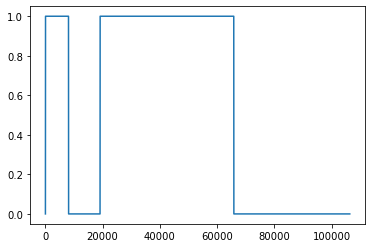

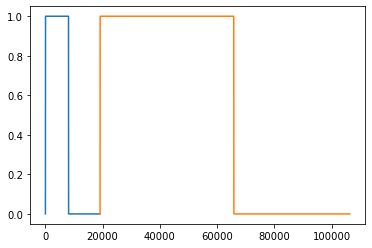

In [3]:
plt.plot(np.arange(0,len(y)),y)
plt.show()
plt.plot(np.arange(0,len(test_labels)),test_labels[:,1])
plt.plot(np.arange(len(test_labels),len(test_labels)+len(train_labels)),train_labels[:,1])
plt.show()


In [4]:
shuffled_index_train =np.arange(0,len(train_labels))
np.random.shuffle(shuffled_index_train)
train_images, train_labels = train_images[shuffled_index_train,:,:,:],train_labels[shuffled_index_train,:]

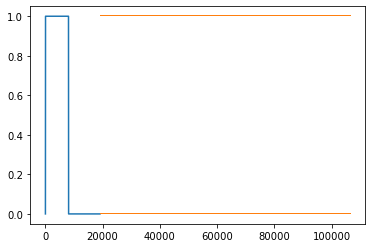

In [5]:
plt.plot(np.arange(0,len(test_labels)),test_labels[:,1])
plt.plot(np.arange(len(test_labels),len(test_labels)+len(train_labels)),train_labels[:,1],',')
plt.show()

In [6]:
train_images.shape

(87273, 256, 16, 1)

In [7]:
model = models.Sequential()

#model.add(layers.Input(train_images.shape[1:]))
model.add(layers.BatchNormalization(axis=1, name='normal1'))
model.add(layers.Convolution2D(1,(16,10),activation = 'relu',padding='valid', strides=(1,2),name='conv1'))
model.add(layers.MaxPooling2D(pool_size=(3,2)))

#model.add(layers.BatchNormalization(axis=1, name='normal2'))
#model.add(layers.Convolution2D(2,(1,2),activation = 'relu',padding='valid', strides=(1,2),name='conv2'))
#model.add(layers.MaxPooling2D(pool_size=(2,1)))

#model.add(layers.BatchNormalization(axis=1, name='normal3'))
#model.add(layers.Convolution2D(64,(1,3),activation = 'relu',padding='valid', strides=(1,1),name='conv3'))
#model.add(layers.MaxPooling2D(pool_size=(2,1)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))



model.add(layers.Dense(32, activation='softmax',name='dens1'))
model.add(layers.Dropout(0.5))



model.add(layers.Dense(2, activation='softmax',name='dens2'))


model.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy','AUC'])
model.evaluate(test_images,  test_labels, verbose=2)


2022-07-08 10:19:03.115102: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-07-08 10:19:04.022185: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9639 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1080 Ti, pci bus id: 0000:65:00.0, compute capability: 6.1
2022-07-08 10:19:05.668418: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8201


597/597 - 4s - loss: 0.7217 - accuracy: 0.4568 - auc: 0.4529 - 4s/epoch - 6ms/step


[0.721695065498352, 0.4568282961845398, 0.4528893530368805]

In [8]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normal1 (BatchNormalization  (None, 256, 16, 1)       1024      
 )                                                               
                                                                 
 conv1 (Conv2D)              (None, 241, 4, 1)         161       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 80, 2, 1)         0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 160)               0         
                                                                 
 dropout (Dropout)           (None, 160)               0         
                                                                 
 dens1 (Dense)               (None, 32)                5

In [9]:


history = model.fit(train_images, train_labels, epochs=20, 
                    validation_data=(test_images, test_labels))


2022-07-07 16:03:19.884463: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1429880832 exceeds 10% of free system memory.
2022-07-07 16:03:21.027203: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1429880832 exceeds 10% of free system memory.


Epoch 1/20
2728/2728 [==============================] - 17s 6ms/step - loss: 0.5830 - accuracy: 0.6417 - auc: 0.7404 - val_loss: 0.4403 - val_accuracy: 0.9476 - val_auc: 0.9791
Epoch 2/20
2728/2728 [==============================] - 15s 5ms/step - loss: 0.4918 - accuracy: 0.7048 - auc: 0.8767 - val_loss: 0.3792 - val_accuracy: 0.9597 - val_auc: 0.9884
Epoch 3/20
2728/2728 [==============================] - 15s 6ms/step - loss: 0.4502 - accuracy: 0.7110 - auc: 0.8953 - val_loss: 0.3383 - val_accuracy: 0.9597 - val_auc: 0.9888
Epoch 4/20
2728/2728 [==============================] - 15s 6ms/step - loss: 0.4179 - accuracy: 0.7486 - auc: 0.9045 - val_loss: 0.3138 - val_accuracy: 0.9633 - val_auc: 0.9888
Epoch 5/20
2728/2728 [==============================] - 15s 6ms/step - loss: 0.3898 - accuracy: 0.9346 - auc: 0.9584 - val_loss: 0.2974 - val_accuracy: 0.9574 - val_auc: 0.9875
Epoch 6/20
2728/2728 [==============================] - 15s 6ms/step - loss: 0.3634 - accuracy: 0.9470 - auc: 0.965

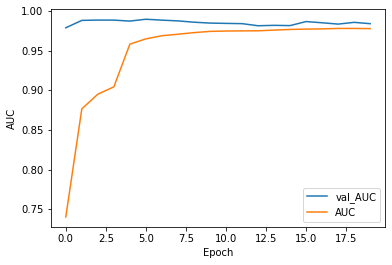

In [10]:
plt.plot(history.history['val_auc'], label = 'val_AUC')
plt.plot(history.history['auc'], label = 'AUC')
plt.xlabel('Epoch')
plt.ylabel('AUC')
plt.legend(loc='lower right')

#model.evaluate(test_images,  test_labels, verbose=2)


In [12]:
for i in range(8):
    if i <= 3:
        model.layers[i].trainable = False
    else:
        model.layers[i].trainable = True
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normal1 (BatchNormalization  (None, 256, 16, 1)       1024      
 )                                                               
                                                                 
 conv1 (Conv2D)              (None, 241, 4, 1)         161       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 80, 2, 1)         0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 160)               0         
                                                                 
 dropout (Dropout)           (None, 160)               0         
                                                                 
 dens1 (Dense)               (None, 32)                5

# Transfert du modèle sur le patient 10

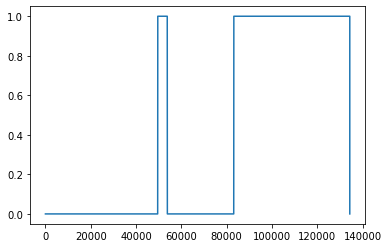

In [9]:
x2,y2 = np.load('/data/thomas/classification epilepsy/chb-mit-scalp-eeg-database-1.0.0/dataset/4hours/temporel'+str(10)+'_x_4hours.npy'),np.load('/data/thomas/classification epilepsy/chb-mit-scalp-eeg-database-1.0.0/dataset/4hours/temporel'+str(10)+'_y_4hours.npy')
plt.plot(np.arange(0,len(y2)),y2)
plt.show()

In [10]:
model.evaluate(np.expand_dims(x2,-1),  to_categorical(y2), verbose=2)

2022-07-08 10:19:22.024114: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 2200059904 exceeds 10% of free system memory.
2022-07-08 10:19:23.606663: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 2200059904 exceeds 10% of free system memory.


4197/4197 - 15s - loss: 0.7119 - accuracy: 0.4740 - auc: 0.4873 - 15s/epoch - 4ms/step


[0.7118965983390808, 0.4739762246608734, 0.48731866478919983]

In [11]:
x2_train, y2_train, x2_test, y2_test = np.concatenate((x2[:47000],x2[70000:])),np.concatenate((y2[:47000],y2[70000:])),x2[47000:70000,:,:],y2[47000:70000]


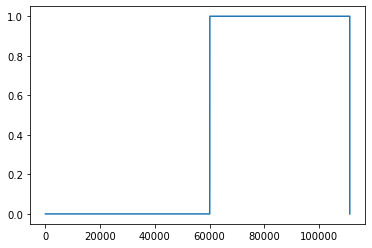

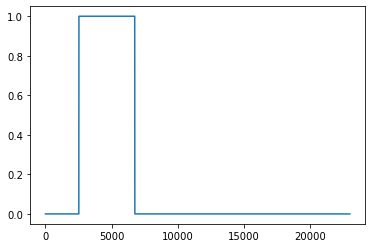

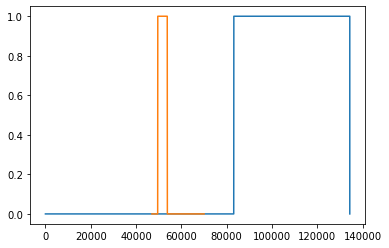

In [12]:
plt.plot(np.arange(0,len(y2_train)),y2_train)
plt.show()
plt.plot(np.arange(0,len(y2_test)),y2_test)
plt.show()
plt.plot(np.concatenate((np.arange(0,len(y2))[:47000],np.arange(0,len(y2))[70000:])),np.concatenate((y2[:47000],y2[70000:])))
plt.plot(np.arange(0,len(y2))[47000:70000],y2[47000:70000])
plt.show()

In [13]:
shuffled_index_train =np.arange(0,len(y2_train))
np.random.shuffle(shuffled_index_train)
x2_train,y2_train = x2_train[shuffled_index_train,:,:],y2_train[shuffled_index_train]
x2_train, y2_train, x2_test, y2_test= np.expand_dims(x2_train,-1),to_categorical(y2_train),np.expand_dims(x2_test,-1),to_categorical(y2_test)
history = model.fit(x2_train, y2_train, epochs=10, 
                    validation_data=(x2_test, y2_test))

2022-07-08 10:19:43.015852: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1823227904 exceeds 10% of free system memory.
2022-07-08 10:19:44.342966: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1823227904 exceeds 10% of free system memory.


Epoch 1/10
3478/3478 [==============================] - 22s 6ms/step - loss: 0.5341 - accuracy: 0.7270 - auc: 0.8103 - val_loss: 0.3440 - val_accuracy: 0.9900 - val_auc: 0.9948
Epoch 2/10
3478/3478 [==============================] - 21s 6ms/step - loss: 0.4439 - accuracy: 0.7551 - auc: 0.9202 - val_loss: 0.3004 - val_accuracy: 0.9909 - val_auc: 0.9951
Epoch 3/10
3478/3478 [==============================] - 21s 6ms/step - loss: 0.3997 - accuracy: 0.7564 - auc: 0.9272 - val_loss: 0.2715 - val_accuracy: 0.9913 - val_auc: 0.9941
Epoch 4/10
3478/3478 [==============================] - 21s 6ms/step - loss: 0.3640 - accuracy: 0.7554 - auc: 0.9279 - val_loss: 0.2485 - val_accuracy: 0.9885 - val_auc: 0.9920
Epoch 5/10
3478/3478 [==============================] - 21s 6ms/step - loss: 0.3310 - accuracy: 0.8926 - auc: 0.9609 - val_loss: 0.2242 - val_accuracy: 0.9910 - val_auc: 0.9940
Epoch 6/10
3478/3478 [==============================] - 21s 6ms/step - loss: 0.3050 - accuracy: 0.9683 - auc: 0.976

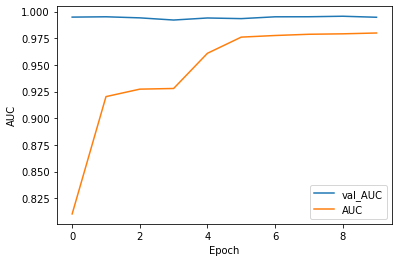

In [14]:
plt.plot(history.history['val_auc'], label = 'val_AUC')
plt.plot(history.history['auc'], label = 'AUC')
plt.xlabel('Epoch')
plt.ylabel('AUC')

plt.legend(loc='lower right')

# transfert du modele sur le patient 7

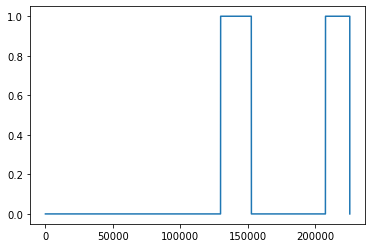

In [15]:
n_patient = 7
x2,y2 = np.load('/data/thomas/classification epilepsy/chb-mit-scalp-eeg-database-1.0.0/dataset/4hours/temporel'+str(n_patient)+'_x_4hours.npy'),np.load('/data/thomas/classification epilepsy/chb-mit-scalp-eeg-database-1.0.0/dataset/4hours/temporel'+str(n_patient)+'_y_4hours.npy')
plt.plot(np.arange(0,len(y2)),y2)
plt.show()

In [16]:
model.evaluate(np.expand_dims(x2,-1),  to_categorical(y2), verbose=2)

2022-07-08 10:23:27.981298: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 3693314048 exceeds 10% of free system memory.


7045/7045 - 26s - loss: 0.3353 - accuracy: 0.9158 - auc: 0.8779 - 26s/epoch - 4ms/step


[0.33534443378448486, 0.9158245325088501, 0.877850353717804]

In [17]:
x2_train, y2_train, x2_test, y2_test = x2[:153000],y2[:153000],x2[153000:],y2[153000:]


In [18]:
shuffled_index_train =np.arange(0,len(y2_train))
np.random.shuffle(shuffled_index_train)
x2_train,y2_train = x2_train[shuffled_index_train,:,:],y2_train[shuffled_index_train]
x2_train, y2_train, x2_test, y2_test= np.expand_dims(x2_train,-1),to_categorical(y2_train),np.expand_dims(x2_test,-1),to_categorical(y2_test)
history = model.fit(x2_train, y2_train, epochs=10, 
                    validation_data=(x2_test, y2_test))

Epoch 1/10
4782/4782 [==============================] - 36s 8ms/step - loss: 0.1797 - accuracy: 0.9108 - auc: 0.9806 - val_loss: 0.2894 - val_accuracy: 0.9283 - val_auc: 0.9130
Epoch 2/10
4782/4782 [==============================] - 35s 7ms/step - loss: 0.1420 - accuracy: 0.9182 - auc: 0.9894 - val_loss: 0.2788 - val_accuracy: 0.9305 - val_auc: 0.9144
Epoch 3/10
4782/4782 [==============================] - 33s 7ms/step - loss: 0.1352 - accuracy: 0.9179 - auc: 0.9894 - val_loss: 0.2746 - val_accuracy: 0.9301 - val_auc: 0.9165
Epoch 4/10
4782/4782 [==============================] - 33s 7ms/step - loss: 0.1299 - accuracy: 0.9184 - auc: 0.9896 - val_loss: 0.2669 - val_accuracy: 0.9350 - val_auc: 0.9170
Epoch 5/10
4782/4782 [==============================] - 33s 7ms/step - loss: 0.1242 - accuracy: 0.9194 - auc: 0.9900 - val_loss: 0.2672 - val_accuracy: 0.9352 - val_auc: 0.9192
Epoch 6/10
4782/4782 [==============================] - 33s 7ms/step - loss: 0.1199 - accuracy: 0.9199 - auc: 0.990

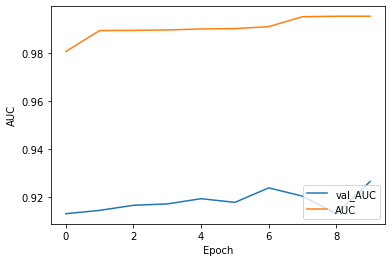

In [19]:
plt.plot(history.history['val_auc'], label = 'val_AUC')
plt.plot(history.history['auc'], label = 'AUC')
plt.xlabel('Epoch')
plt.ylabel('AUC')
plt.legend(loc='lower right')

# Transfert sur patient 22

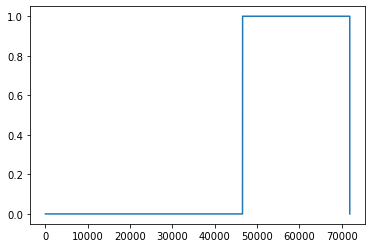

In [20]:
n_patient = 22
x2,y2 = np.load('/data/thomas/classification epilepsy/chb-mit-scalp-eeg-database-1.0.0/dataset/4hours/temporel'+str(n_patient)+'_x_4hours.npy'),np.load('/data/thomas/classification epilepsy/chb-mit-scalp-eeg-database-1.0.0/dataset/4hours/temporel'+str(n_patient)+'_y_4hours.npy')
plt.plot(np.arange(0,len(y2)),y2)
plt.show()

In [21]:
model.evaluate(np.expand_dims(x2,-1),  to_categorical(y2), verbose=2)

2248/2248 - 8s - loss: 0.3438 - accuracy: 0.9037 - auc: 0.9282 - 8s/epoch - 4ms/step


[0.3437965512275696, 0.9037062525749207, 0.928244948387146]

In [22]:
x2_train, y2_train, x2_test, y2_test = np.concatenate((x2[:30000],x2[55000:])),np.concatenate((y2[:30000],y2[55000:])),x2[30000:55000],y2[30000:55000]


In [23]:
shuffled_index_train =np.arange(0,len(y2_train))
np.random.shuffle(shuffled_index_train)
x2_train,y2_train = x2_train[shuffled_index_train,:,:],y2_train[shuffled_index_train]
x2_train, y2_train, x2_test, y2_test= np.expand_dims(x2_train,-1),to_categorical(y2_train),np.expand_dims(x2_test,-1),to_categorical(y2_test)
history = model.fit(x2_train, y2_train, epochs=10, 
                    validation_data=(x2_test, y2_test))

Epoch 1/10
1466/1466 [==============================] - 12s 8ms/step - loss: 0.1837 - accuracy: 0.9685 - auc: 0.9828 - val_loss: 0.2709 - val_accuracy: 0.8963 - val_auc: 0.9644
Epoch 2/10
1466/1466 [==============================] - 11s 7ms/step - loss: 0.1509 - accuracy: 0.9781 - auc: 0.9902 - val_loss: 0.2844 - val_accuracy: 0.8933 - val_auc: 0.9627
Epoch 3/10
1466/1466 [==============================] - 11s 7ms/step - loss: 0.1443 - accuracy: 0.9798 - auc: 0.9916 - val_loss: 0.3194 - val_accuracy: 0.8776 - val_auc: 0.9568
Epoch 4/10
1466/1466 [==============================] - 11s 7ms/step - loss: 0.1384 - accuracy: 0.9822 - auc: 0.9924 - val_loss: 0.3219 - val_accuracy: 0.8786 - val_auc: 0.9509
Epoch 5/10
1466/1466 [==============================] - 11s 7ms/step - loss: 0.1377 - accuracy: 0.9807 - auc: 0.9927 - val_loss: 0.2615 - val_accuracy: 0.9052 - val_auc: 0.9676
Epoch 6/10
1466/1466 [==============================] - 11s 7ms/step - loss: 0.1340 - accuracy: 0.9825 - auc: 0.992

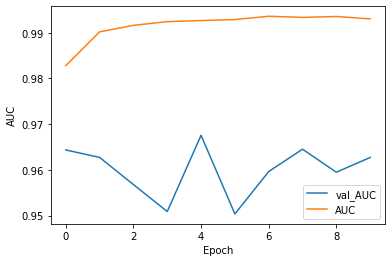

In [24]:
plt.plot(history.history['val_auc'], label = 'val_AUC')
plt.plot(history.history['auc'], label = 'AUC')
plt.xlabel('Epoch')
plt.ylabel('AUC')
plt.legend(loc='lower right')

# transfert sur patient 16

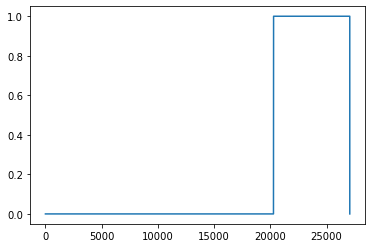

In [25]:
n_patient = 16
x2,y2 = np.load('/data/thomas/classification epilepsy/chb-mit-scalp-eeg-database-1.0.0/dataset/4hours/temporel'+str(n_patient)+'_x_4hours.npy'),np.load('/data/thomas/classification epilepsy/chb-mit-scalp-eeg-database-1.0.0/dataset/4hours/temporel'+str(n_patient)+'_y_4hours.npy')
plt.plot(np.arange(0,len(y2)),y2)
plt.show()

In [26]:
model.evaluate(np.expand_dims(x2,-1),  to_categorical(y2), verbose=2)

846/846 - 3s - loss: 1.0741 - accuracy: 0.6569 - auc: 0.7013 - 3s/epoch - 4ms/step


[1.0741076469421387, 0.6568504571914673, 0.7012758851051331]

In [27]:
x2_train, y2_train, x2_test, y2_test = np.concatenate((x2[:15000],x2[22000:])),np.concatenate((y2[:15000],y2[22000:])),x2[15000:22000],y2[15000:22000]


In [28]:
shuffled_index_train =np.arange(0,len(y2_train))
np.random.shuffle(shuffled_index_train)
x2_train,y2_train = x2_train[shuffled_index_train,:,:],y2_train[shuffled_index_train]
x2_train, y2_train, x2_test, y2_test= np.expand_dims(x2_train,-1),to_categorical(y2_train),np.expand_dims(x2_test,-1),to_categorical(y2_test)
history = model.fit(x2_train, y2_train, epochs=10, 
                    validation_data=(x2_test, y2_test))

Epoch 1/10
627/627 [==============================] - 5s 8ms/step - loss: 0.7034 - accuracy: 0.6999 - auc: 0.7801 - val_loss: 0.4973 - val_accuracy: 0.6840 - val_auc: 0.8203
Epoch 2/10
627/627 [==============================] - 4s 7ms/step - loss: 0.4299 - accuracy: 0.7537 - auc: 0.8654 - val_loss: 0.3865 - val_accuracy: 0.7441 - val_auc: 0.8668
Epoch 3/10
627/627 [==============================] - 5s 7ms/step - loss: 0.3905 - accuracy: 0.7913 - auc: 0.8938 - val_loss: 0.3735 - val_accuracy: 0.7666 - val_auc: 0.8853
Epoch 4/10
627/627 [==============================] - 4s 7ms/step - loss: 0.3711 - accuracy: 0.8116 - auc: 0.9073 - val_loss: 0.3615 - val_accuracy: 0.7801 - val_auc: 0.8925
Epoch 5/10
627/627 [==============================] - 5s 7ms/step - loss: 0.3044 - accuracy: 0.8808 - auc: 0.9469 - val_loss: 0.3598 - val_accuracy: 0.8031 - val_auc: 0.9035
Epoch 6/10
627/627 [==============================] - 5s 7ms/step - loss: 0.2826 - accuracy: 0.8969 - auc: 0.9531 - val_loss: 0.36

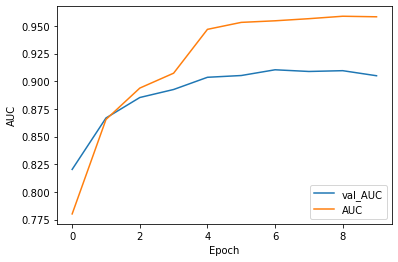

In [29]:
plt.plot(history.history['val_auc'], label = 'val_AUC')
plt.plot(history.history['auc'], label = 'AUC')
plt.xlabel('Epoch')
plt.ylabel('AUC')
plt.legend(loc='lower right')